In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

In [68]:
X_train = pd.read_csv('./Datasets/Logistic_X_Train.csv')
Y_train = pd.read_csv('./Datasets/Logistic_Y_Train.csv')
X_test = pd.read_csv('./Datasets/Logistic_X_Test.csv')
sample = pd.read_csv('./Datasets/SampleOutput.csv')

In [63]:
X_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [64]:
X_train.shape

(3000, 3)

In [65]:
X_train.describe()

,f1,f2,f3
count,3000.000000,3000.000000,3000.000000
mean,0.007453,0.999286,0.029487
std,1.334138,1.023853,1.209558
min,-3.470773,-3.692615,-3.286481
25%,-1.045220,0.325665,-0.986959
50%,-0.144115,1.004693,0.225411
75%,1.052555,1.693354,1.041319
max,3.741376,4.185015,2.706148


In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# plt.style.use('seaborn')
# fig = plt.figure()
# axes = fig.gca(projection='3d')
# axes.plot_surface(X_train_np[:,0],X_train_np[:,1],X_train_np[:,2])

In [25]:
Y_train.shape


(3000, 1)

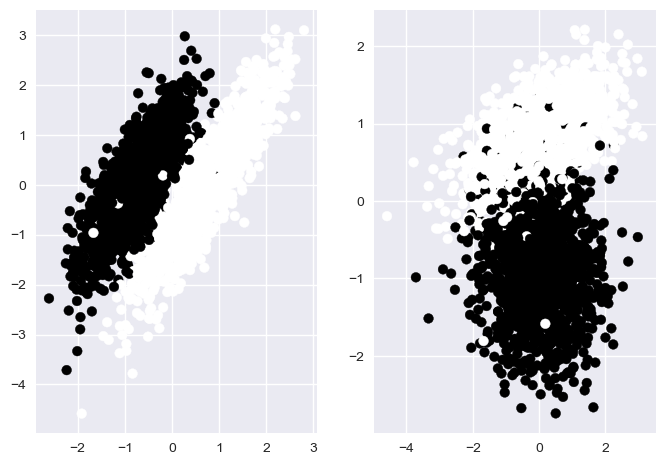

In [43]:
## Visualisation
plt.style.use('seaborn')
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1],c =Y_train.reshape(-1,))


plt.subplot(1,2,2)
#plt.plot(X_train[:,1])
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train.reshape(-1,))
plt.show()

In [69]:
data = X_train.copy()
data['y'] = Y_train.values
data.head()

,f1,f2,f3,y
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0


In [70]:
X_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


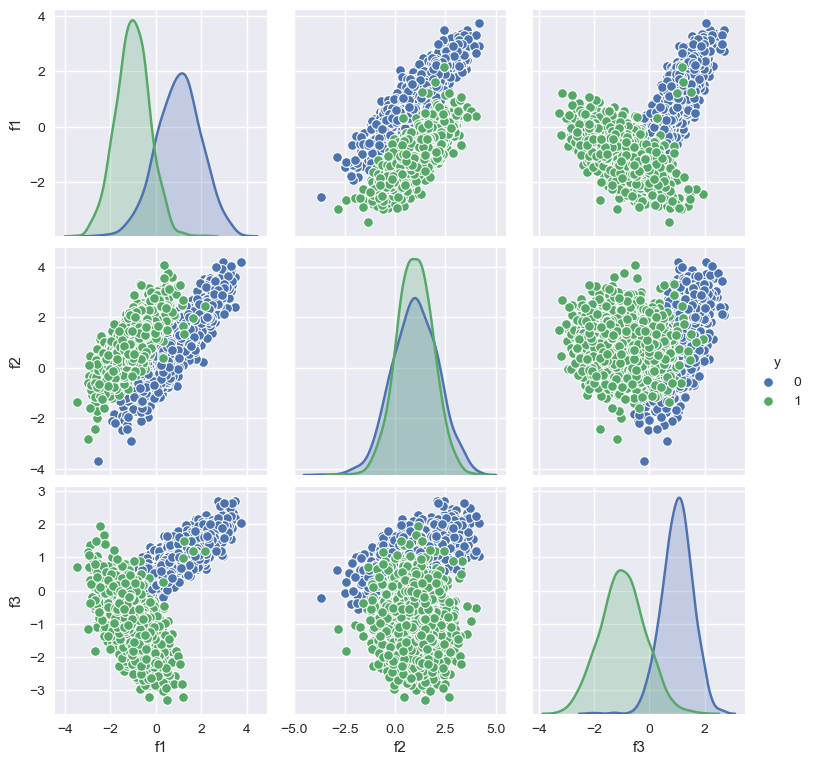

In [57]:
sns.pairplot(data,hue='y')

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [71]:
#Normalise the dataset
X_train = X_train.values
Y_train = Y_train.values

u = X_train.mean(axis=0)
std = X_train.std(axis=0)
print(u.shape,std.shape)
X_train = (X_train - u)/std

#Applying the same transformation on X_test, because line is trained by X_train..therefore we need to equally shif our data points
X_test = (X_test - u)/std

(3,) (3,)


## Implementation

In [127]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,Y,theta):
    e = 0
    hi = hypothesis(X,theta)
    e = Y*np.log(hi) + (1-Y)*np.log(1-hi)
    e = -1.0*np.mean(e)
    return e

def gradient(X,Y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(Y - hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,Y,lr=0.1,max_steps=500):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        err = error(X,Y,theta)
        error_list.append(err)
        
        theta = theta + lr*grad
        
    return theta,error_list

In [128]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
print(X_new_train.shape)
print(X_new_train[:4])

(3000, 4)
[[ 1.         -0.93471307 -0.24439694 -0.46140414]
 [ 1.         -0.7823013  -0.19327286 -1.08586573]
 [ 1.         -0.46707053  0.56681072 -1.17534766]
 [ 1.          0.99595846  0.34128188  1.16101187]]


In [129]:
Y_train.shape

(3000, 1)

In [130]:
theta,error_list = gradient_descent(X_new_train,Y_train)

In [131]:
theta

array([[-0.34767648],
       [-2.54073799],
       [ 1.38266256],
       [-2.30256859]])

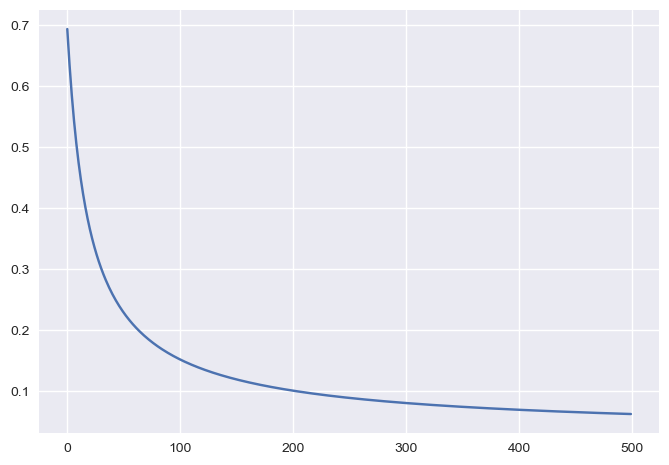

In [132]:
plt.plot(error_list)
plt.show()

In [133]:
def predict(X,theta):
    h = hypothesis(X,theta)
    #print(h)
    #print(h>0.5)
    output = np.zeros(h.shape)
    
    output[h >= 0.5] = 1.0
    output = output.astype('int')
    return output
    

In [134]:
XTrain_preds = predict(X_new_train,theta)
XTrain_preds[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

In [135]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    
    print(actual.shape,preds.shape)
    acc = np.sum(actual == preds)
    print(acc)
    acc = acc/actual.shape[0]
    
    return acc*100

In [136]:
XTrain_acc = accuracy(Y_train,XTrain_preds)

(3000, 1) (3000, 1)
2978


In [137]:
XTrain_acc

99.26666666666667

In [138]:
ones = np.ones((X_test.shape[0],1))
X_new_test = np.hstack((ones,X_test))
print(X_new_test.shape)
print(X_new_test[:4])

(1000, 4)
[[ 1.         -0.58096727 -1.23196981 -2.10386172]
 [ 1.         -0.93642077  0.43931113 -0.36596031]
 [ 1.          1.43773502  0.91090225  1.08581064]
 [ 1.         -0.97885386  0.04930706 -0.46041534]]


In [160]:
XTest_preds = predict(X_new_test,theta)

In [161]:
XTest_preds.shape

(1000, 1)

In [162]:
sample.head()

,label
0,1
1,1
2,1
3,0
4,0


In [142]:
sample.shape

(3000, 1)

In [170]:
predictions = pd.DataFrame(XTest_preds,columns=['label'],dtype='int64')

In [171]:
predictions.head()

,label
0,1
1,1
2,0
3,1
4,1


In [172]:
sample['label'].dtype

dtype('int64')

In [173]:
predictions['label'].dtype

dtype('int64')

In [174]:
predictions.shape

(1000, 1)

In [175]:
predictions.to_csv('predictions.csv',index=False)

In [176]:
subm = pd.read_csv('predictions.csv')

In [177]:
subm.head()

,label
0,1
1,1
2,0
3,1
4,1
